# Libraries used in the project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_csv('/kaggle/input/dataset/datafile (1).csv')
df1.head() # top 5 records

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72


# Creating Visualizations

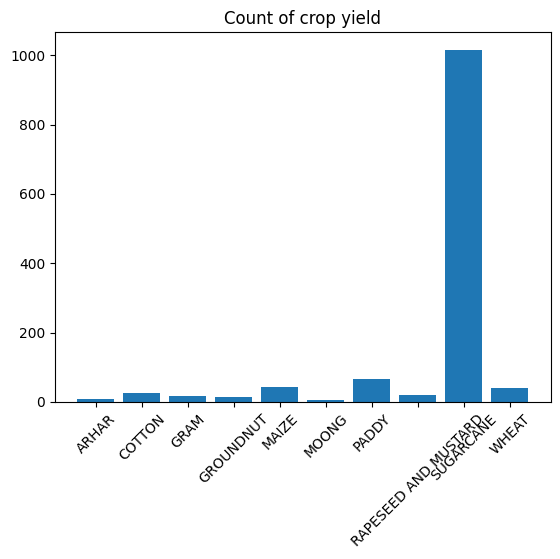

In [30]:
# Bar Chart
plt.title('Count of crop yield')
plt.bar(df1['Crop'], df1['Yield (Quintal/ Hectare) '])
plt.xticks(rotation=45)
plt.show()

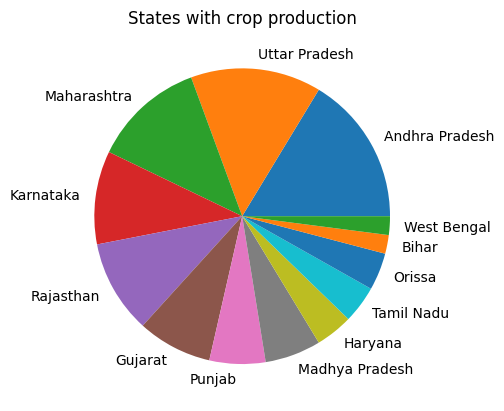

In [4]:
# Pie Chart
plt.title('States with crop production')
n=df1['State'].value_counts()
plt.pie(n, labels=n.index)
plt.show()

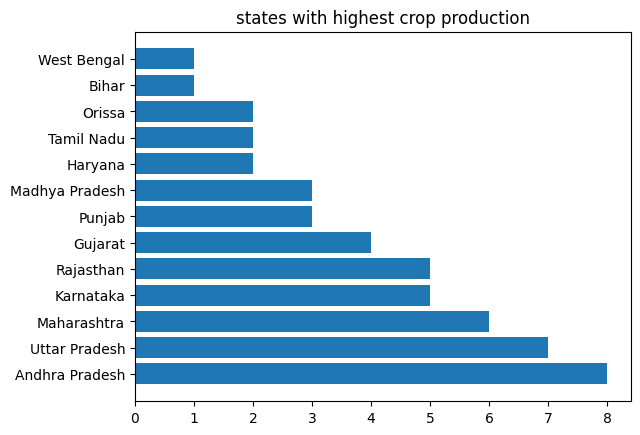

In [5]:
# bar chart
plt.title('states with highest crop production')
a=df1['State'].value_counts()
plt.barh(a.index, a.values)
plt.show()

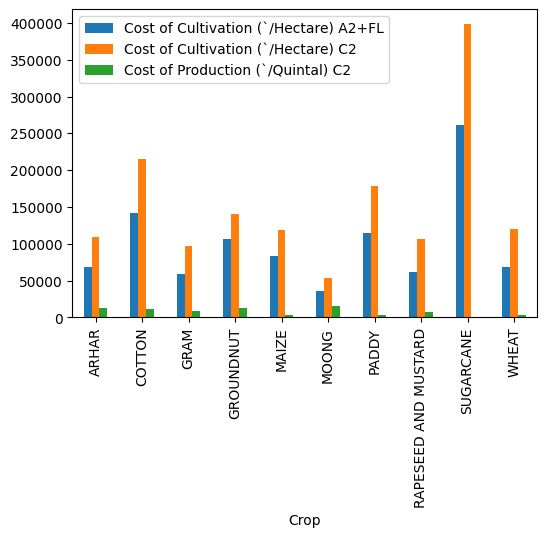

In [31]:
# countplot
columns=df1.columns
df1.groupby('Crop')[columns[:-1]].sum().plot(kind='bar', figsize=(6,4))
plt.show()

In [7]:
df1.columns

Index(['Crop', 'State', 'Cost of Cultivation (`/Hectare) A2+FL',
       'Cost of Cultivation (`/Hectare) C2',
       'Cost of Production (`/Quintal) C2', 'Yield (Quintal/ Hectare) '],
      dtype='object')

In [8]:
df = pd.DataFrame(df1)

# Specify columns to select
columns_to_select = ['Cost of Cultivation (`/Hectare) A2+FL',
       'Cost of Cultivation (`/Hectare) C2',
       'Cost of Production (`/Quintal) C2', 'Yield (Quintal/ Hectare) ']

# Use loc to select columns
df_selected = df.loc[:, columns_to_select]

In [9]:

# Calculate correlation matrix
correlation_matrix = df_selected.corr()

<Axes: >

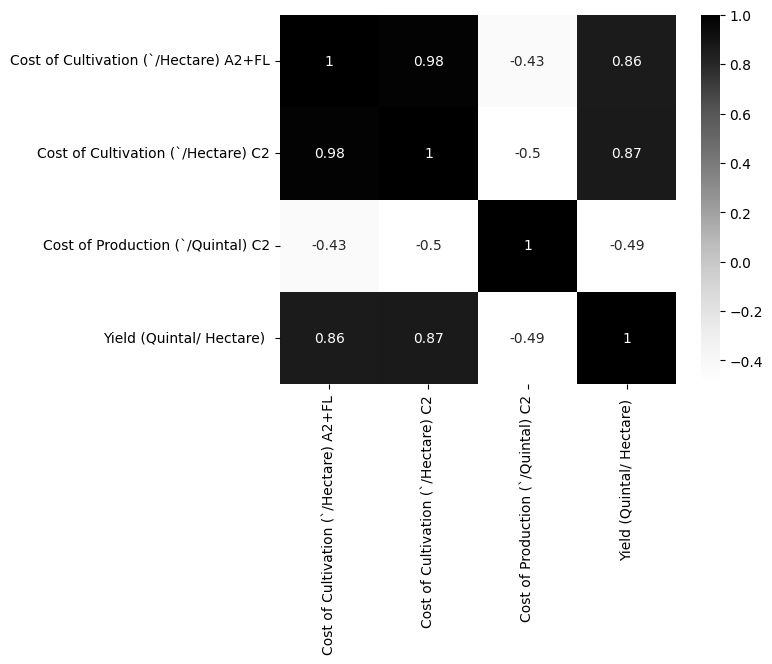

In [10]:
#graphically
sns.heatmap(correlation_matrix,annot=True, cmap='Greys')

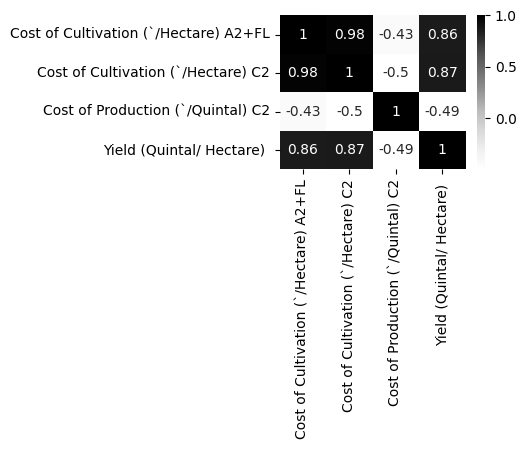

In [36]:
# Set the size of the figure
plt.figure(figsize=(3, 2))  # Adjust width and height as needed

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='Greys')

# Show the plot
plt.show()

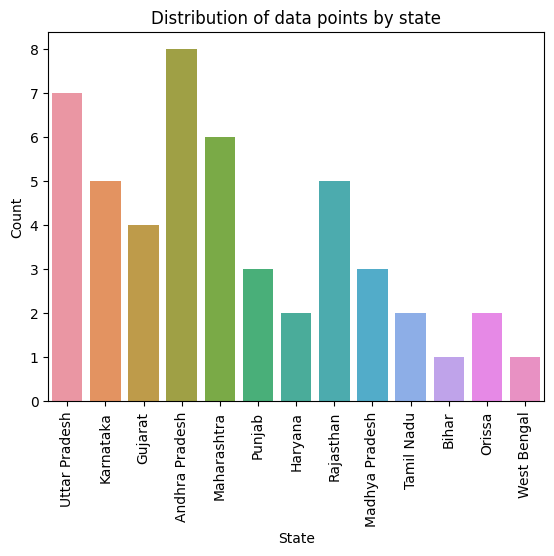

In [11]:
#distribtion of data points by state
sns.countplot (data=df1, x= 'State')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution of data points by state')
plt.xticks(rotation=90)
plt.show()

# A different project

In [12]:
# libraries used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from math import radians, sin, cos, sqrt, atan2
from scipy.optimize import curve_fit
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor 
from sklearn import svm

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [13]:
# Load the rainfall dataset in Rwandan Districts
rainfall_df_rwanda = pd.read_csv("/kaggle/input/big-data/RwandaDistrictRainfall.csv",skiprows=1)
# Load the vegetation dataset
vegetation_df_rwanda = pd.read_csv("/kaggle/input/big-data/RwandaDistrictVegetation.csv",skiprows=1)

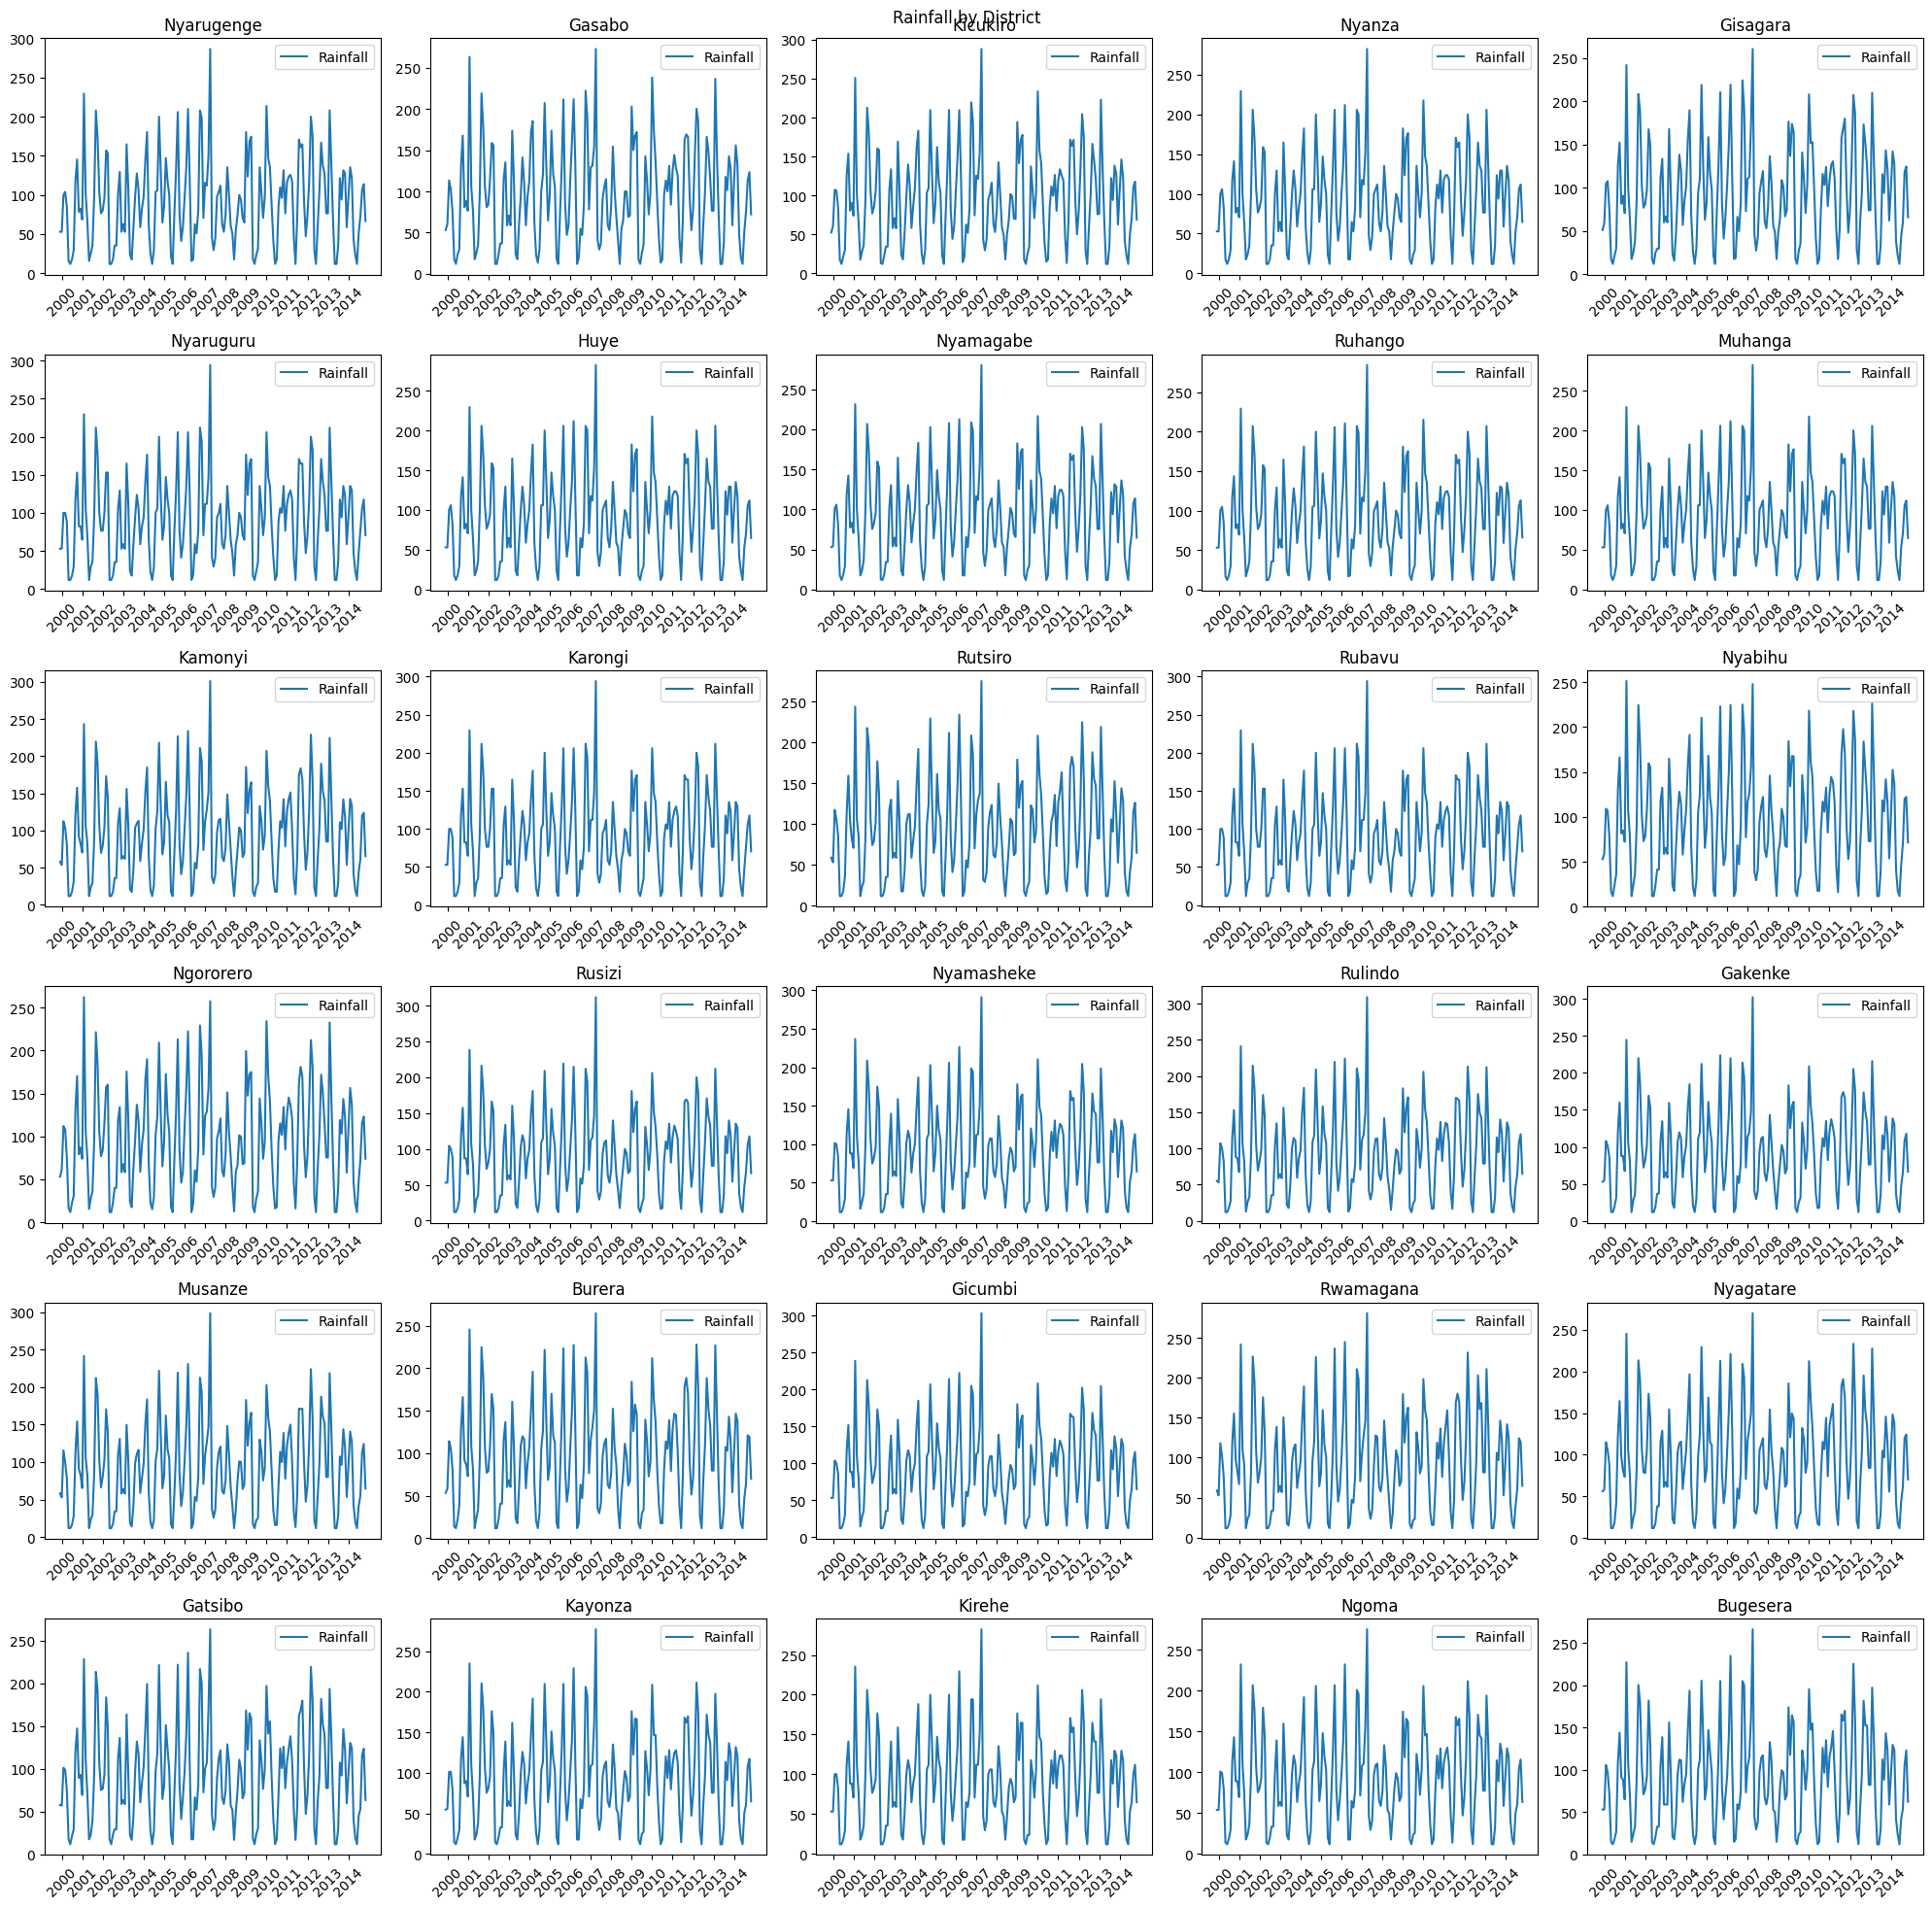

In [14]:
# Extract the rows corresponding to the districts and their monthly values
rainfall_districts = rainfall_df_rwanda.iloc[:30, :]
# Create a list of all the districts
districts = rainfall_districts["Month"].tolist()
# Create a 6x5 subplot grid
fig, axs = plt.subplots(nrows=6, ncols=5, figsize=(20, 20))
# Loop over each district and plot the time series graphs for rainfall and vegetation index
for index, district in enumerate(districts):
    # Calculate the subplot coordinates based on the index of the district in the list
    row = index // 5
    column = index % 5
    # Select the rainfall and vegetation index data for the current district
    rainfall = rainfall_districts.loc[rainfall_districts["Month"] == district].iloc[:, 1:]
    # Plot the rainfall and vegetation index time series on the current subplot
    axs[row, column].plot(rainfall.columns, rainfall.values.squeeze(), label="Rainfall")    
    # Set the title and legend for the current subplot
    axs[row, column].set_title(district)
    axs[row, column].legend()
    # Add x-axis ticks for each year from 2000 to 2014
    axs[row, column].set_xticks(range(1, 181, 12))
    axs[row, column].set_xticklabels(range(2000, 2015), rotation=45)

# title to the figure
fig.suptitle("Rainfall by District")
# the spacing between subplots
plt.tight_layout()
# Display the plot
plt.show()

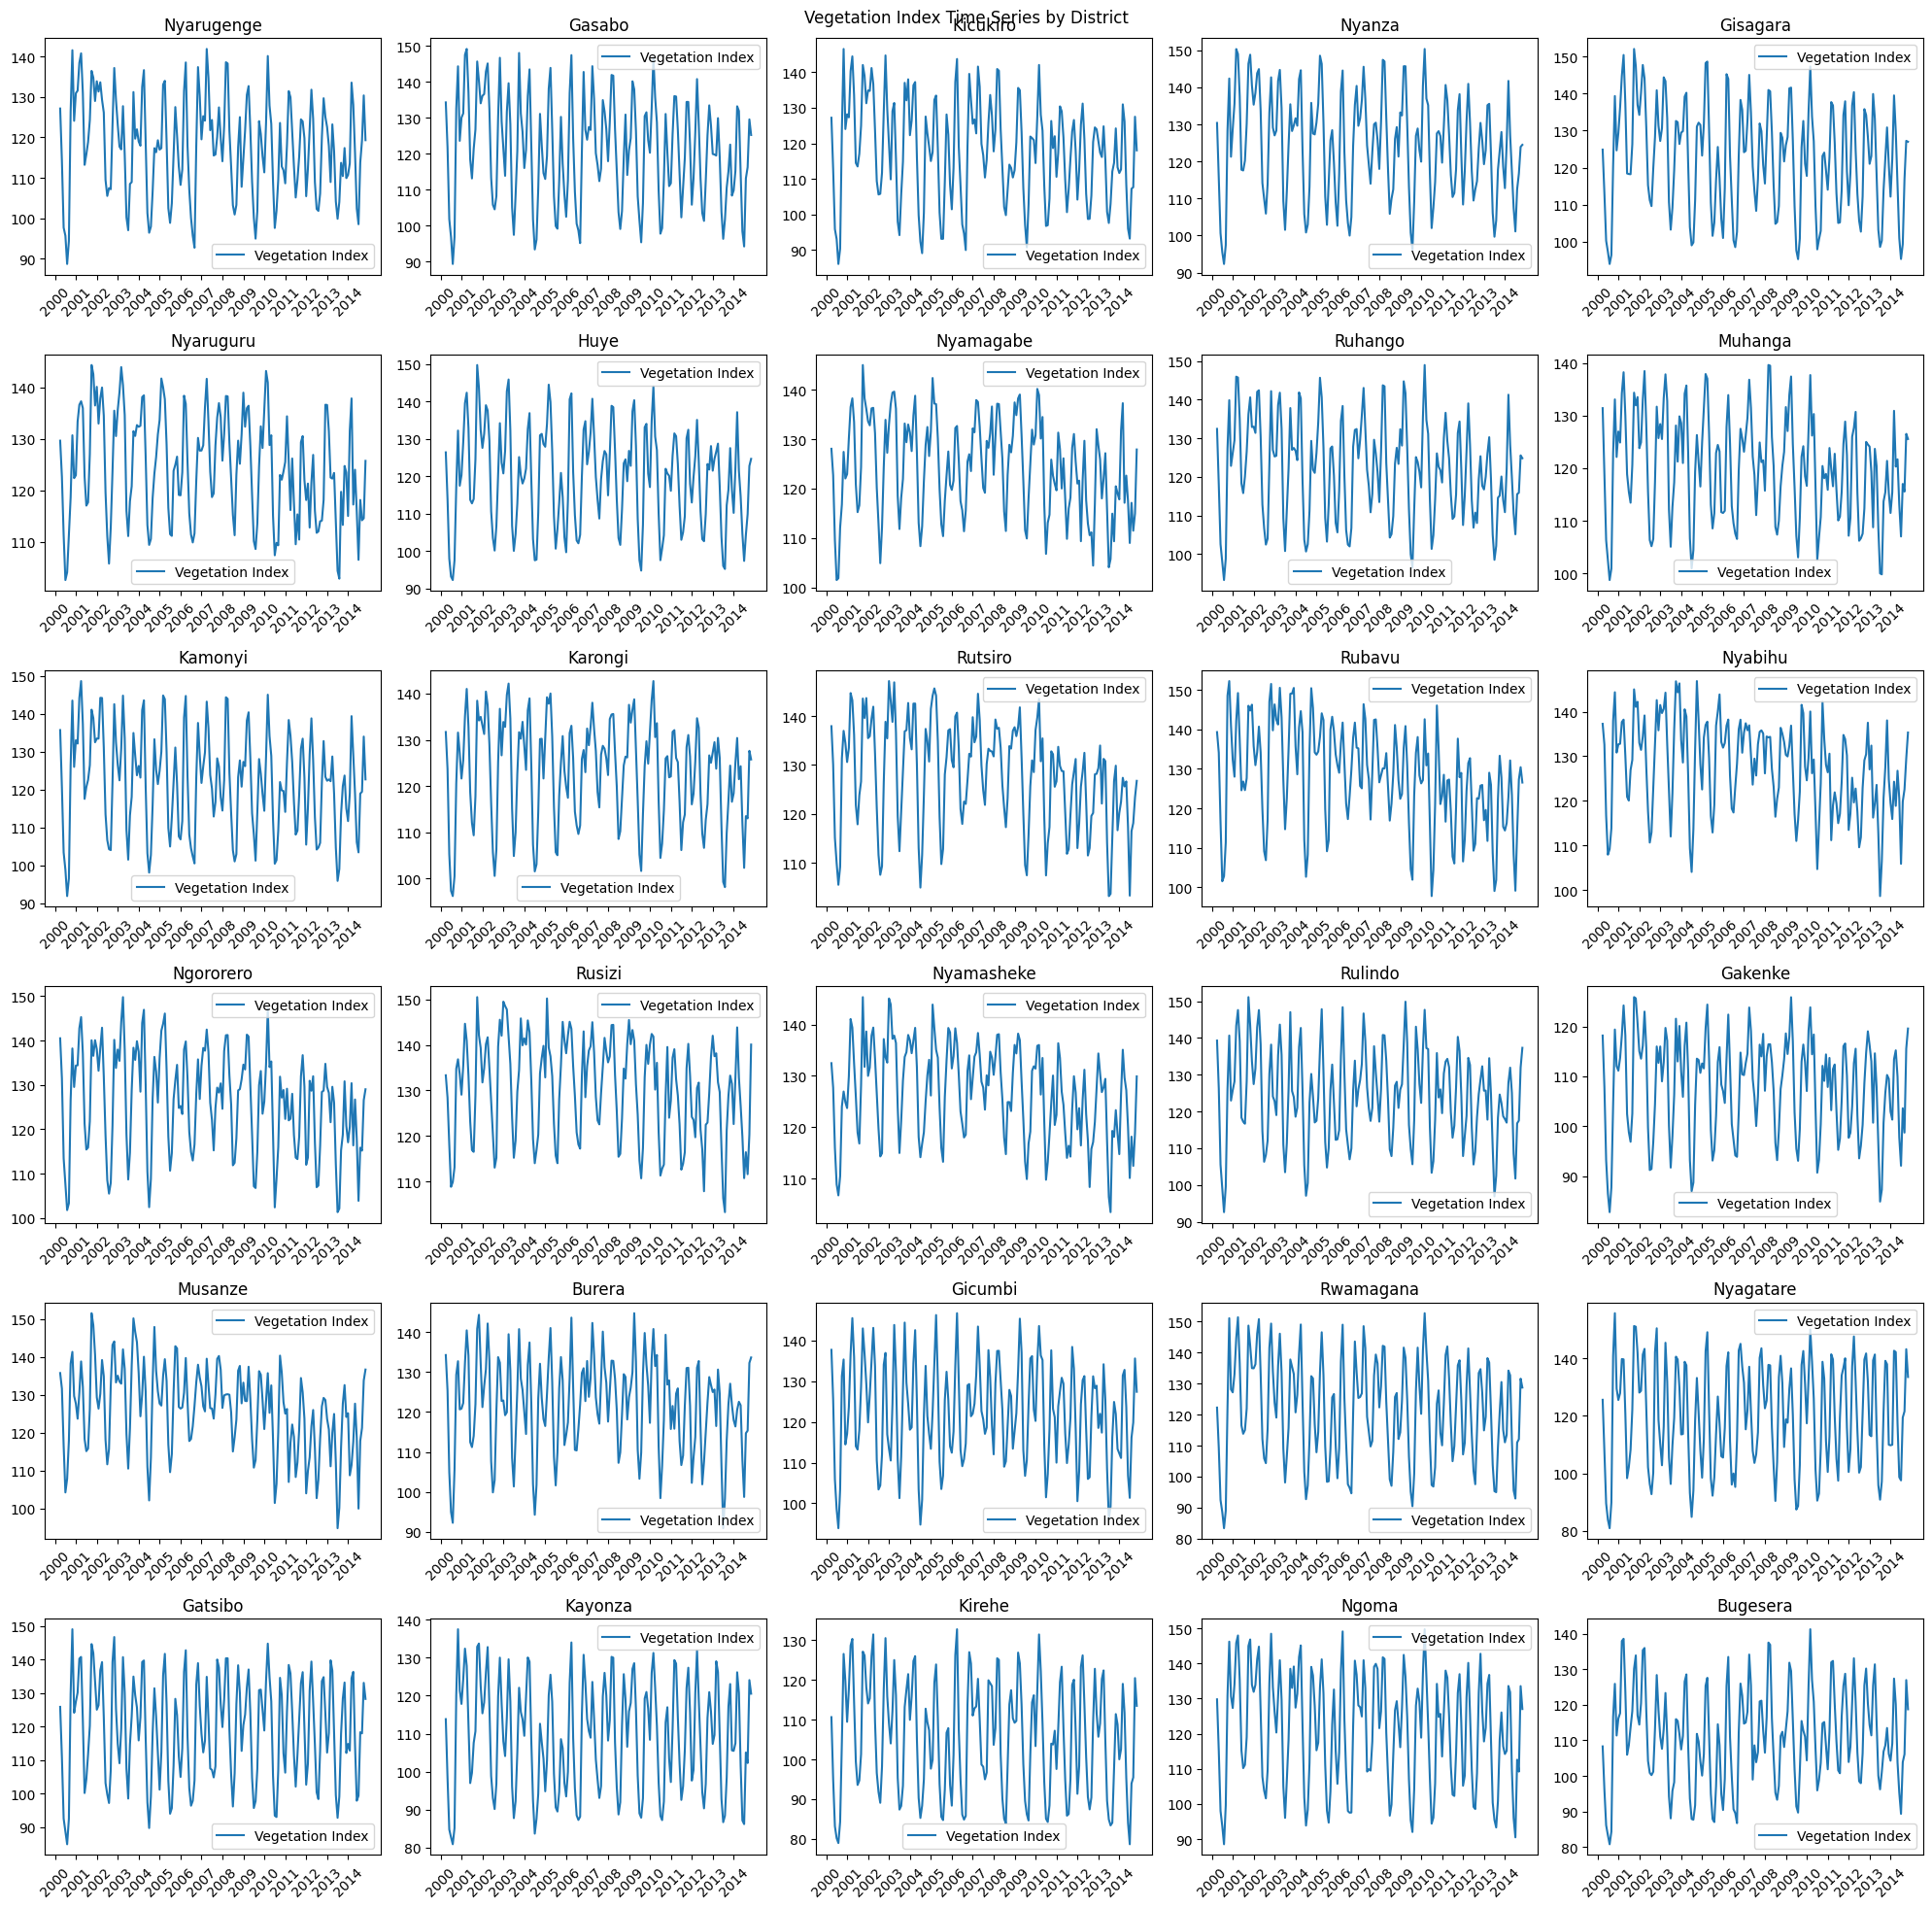

In [15]:
# Extract the rows corresponding to the districts and their monthly values
veg_index_districts = vegetation_df_rwanda.iloc[:30, :]
# Create a list of all the districts
districts = vegetation_df_rwanda["District"].tolist()
# Create a 6x5 subplot grid
fig, axs = plt.subplots(nrows=6, ncols=5, figsize=(20, 20))
# plot the time series graphs for rainfall and vegetation index
for index, district in enumerate(districts):
    # Calculate the subplot coordinates based on the index of the district in the list
    row = index // 5
    column = index % 5
    # Select the rainfall and vegetation index data for the current district
    veg_index = veg_index_districts.loc[veg_index_districts["District"] == district].iloc[:, 1:]
    # Plot the rainfall and vegetation index time series on the current subplot
    axs[row, column].plot(veg_index.columns, veg_index.values.squeeze(), label="Vegetation Index")
    # Set the title and legend for the current subplot
    axs[row, column].set_title(district)
    axs[row, column].legend()
    # Add x-axis ticks for each year from 2000 to 2014
    axs[row, column].set_xticks(range(1, 181, 12))
    axs[row, column].set_xticklabels(range(2000, 2015), rotation=45)

# Add a main title to the figure
fig.suptitle("Vegetation Index Time Series by District")
# Adjust the spacing between subplots
plt.tight_layout()
# Display the plot
plt.show()


In [16]:
# create a dictionary to map each month abbreviation to its full name
month_map =['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
for month_abbr in month_map:
    # create a new dataset for the current month
    month_df = rainfall_df_rwanda[rainfall_df_rwanda.columns[rainfall_df_rwanda.columns.str.startswith(month_abbr)]]
    month_veg_df = vegetation_df_rwanda[vegetation_df_rwanda.columns[vegetation_df_rwanda.columns.str.startswith(month_abbr)]] 
    
    if month_abbr =='JAN':
        jan_df = month_df
        jan_veg_df = month_veg_df
    elif month_abbr =='FEB':
        feb_df = month_df
        feb_veg_df = month_veg_df
    elif month_abbr == 'MAR':
        mar_df = month_df
        mar_veg_df = month_veg_df
    elif month_abbr == 'APR':
        apr_df = month_df
        apr_veg_df = month_veg_df
    elif month_abbr == 'MAY':
        may_df = month_df
        may_veg_df = month_veg_df
    elif month_abbr =='JUN':
        jun_df = month_df
        jun_veg_df = month_veg_df
    elif month_abbr =='JUL':
        jul_df = month_df
        jul_veg_df = month_veg_df
    elif month_abbr =='AUG':
        aug_df = month_df
        aug_veg_df = month_veg_df
    elif month_abbr == 'SEP':
        sep_df = month_df
        sep_veg_df = month_veg_df
    elif month_abbr =='OCT':
        oct_df = month_df
        oct_veg_df = month_veg_df
    elif month_abbr =='NOV':
        nov_df = month_df
        nov_veg_df = month_veg_df
    elif month_abbr =='DEC':
        dec_df = month_df
        dec_veg_df = month_veg_df

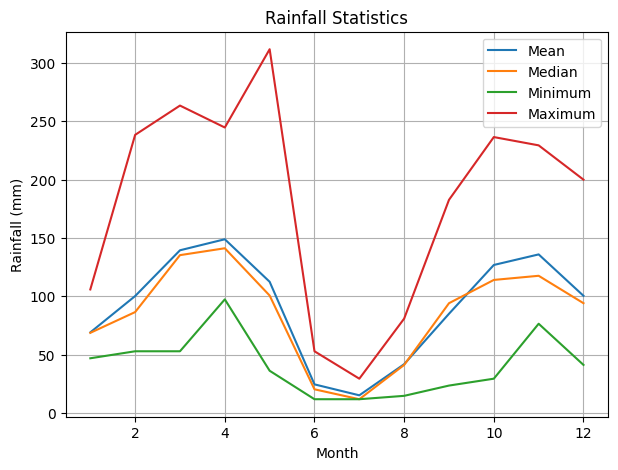

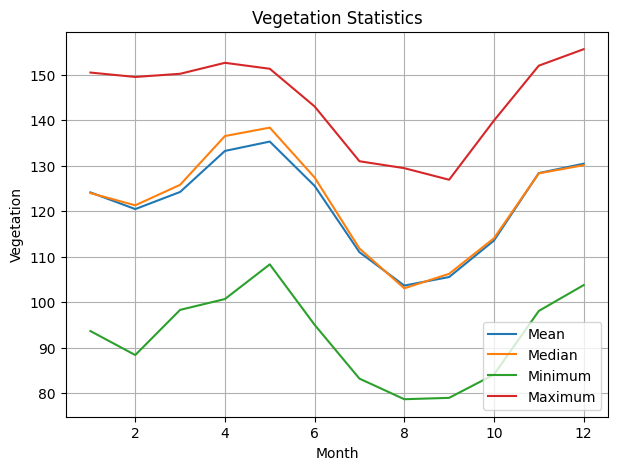

In [26]:
# Create a list of the dataframes for each month
dfs = [jan_df, feb_df, mar_df, apr_df, may_df, jun_df, jul_df, aug_df, sep_df, oct_df, nov_df, dec_df]
df_vegs = [jan_veg_df, feb_veg_df, mar_veg_df, apr_veg_df, may_veg_df, jun_veg_df, jul_veg_df, aug_veg_df,\
           sep_veg_df, oct_veg_df, nov_veg_df, dec_veg_df]
# Calculate statistics for each month
means = []
medians = []
minimums = []
maximums = []
for df in dfs:
    avg_values_1=df.mean(axis=1)
    avg_values=avg_values_1.mean()
    means.append(avg_values)
    med_values_1=df.median(axis=1)
    med_values=med_values_1.median()
    medians.append(med_values)
    min_values_1=df.min(axis=1)
    min_values=min_values_1.min()
    minimums.append(min_values)
    max_values_1=df.max(axis=1)
    max_values =max_values_1.max()
    maximums.append(max_values)

# # Create a plot of the rainfall statistics
months = np.arange(1, 13)
plt.figure(figsize=(7,5))
plt.plot(months, means, label='Mean')
plt.plot(months, medians, label='Median')
plt.plot(months, minimums, label='Minimum')
plt.plot(months, maximums, label='Maximum')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall Statistics')
plt.legend()
plt.grid()
plt.show()

# # Calculate statistics for the vegetation index
vi_means = []
vi_medians = []
vi_minimums = []
vi_maximums = []
for df_veg in df_vegs:
    avg_values_v_1=df_veg.mean(axis=1)
    avg_values_v=avg_values_v_1.mean()
    vi_means.append(avg_values_v)
    med_values_v_1=df_veg.median(axis=1)
    med_values_v=med_values_v_1.median()
    vi_medians.append(med_values_v)
    min_values_v_1=df_veg.min(axis=1)
    min_values_v=min_values_v_1.min()
    vi_minimums.append(min_values_v)
    max_values_v_1=df_veg.max(axis=1)
    max_values_v =max_values_v_1.max()
    vi_maximums.append(max_values_v)
# # Create a plot of the vegetation index statistics
plt.figure(figsize=(7,5))
plt.plot(months, vi_means, label='Mean')
plt.plot(months, vi_medians, label='Median')
plt.plot(months, vi_minimums, label='Minimum')
plt.plot(months, vi_maximums, label='Maximum')
plt.xlabel('Month')
plt.ylabel('Vegetation')
plt.title('Vegetation Statistics')
plt.grid()
plt.legend()
plt.show()


In [18]:
rwanda_district_centroids=pd.read_csv("/kaggle/input/big-data/RwandaDistrictCentroidsLongitude_Latitude.csv")

In [19]:
# Define a function to fit the correlation decay model
def correlation_decay_model(d, c0, a):
    return c0 * np.exp(-a * d)

In [20]:
rainfall=rainfall_df_rwanda.set_index('Month')
rainfall.index.name=None
rainfall=rainfall.T[4:]
corr_m=rainfall.corr()

In [21]:
# Define Haversine function to calculate distance between two points
def haversine_distance_computation(lat1, lon1, lat2, lon2):
    # Convert decimal degrees to radians 
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    r = 6371  # Radius of earth in kilometers.
    return c * r

# Create a list of all the districts
districts = rwanda_district_centroids['District'].unique()

# Initialize empty lists to store distances
district_distances = []
all_distances = []

for i in range(len(districts)):
    distances = []
    for j in range(len(districts)):
        if i == j:
            distances.append(0)
        else:
            lat1, lon1 = rwanda_district_centroids.loc[rwanda_district_centroids['District']==districts[i], ['Latitude', 'Longitude']].values[0]
            lat2, lon2 = rwanda_district_centroids.loc[rwanda_district_centroids['District']==districts[j], ['Latitude', 'Longitude']].values[0]
            distance = haversine_distance_computation(lat1, lon1, lat2, lon2)
            distances.append(distance)
            district_distances.append((districts[i], districts[j], distance))
    all_distances.append(distances)

In [22]:
corr_flattened=np.array(corr_m).flatten()
distances_flattened=np.array(all_distances).flatten()

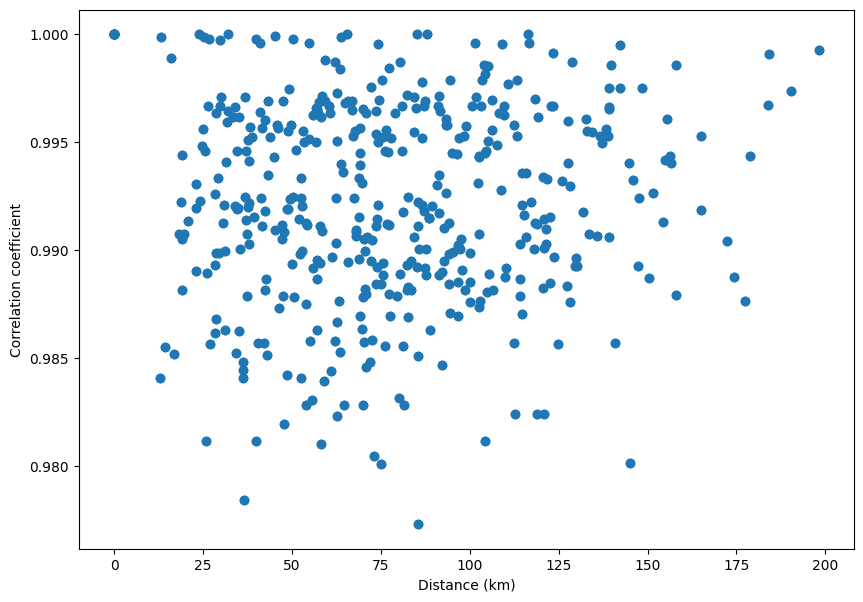

In [23]:
# The correlation values versus the distance between districts's district
plt.figure(figsize=(10,7))
plt.scatter(all_distances, corr_m)
# labelling
plt.xlabel("Distance (km)")
plt.ylabel("Correlation coefficient")
plt.show()

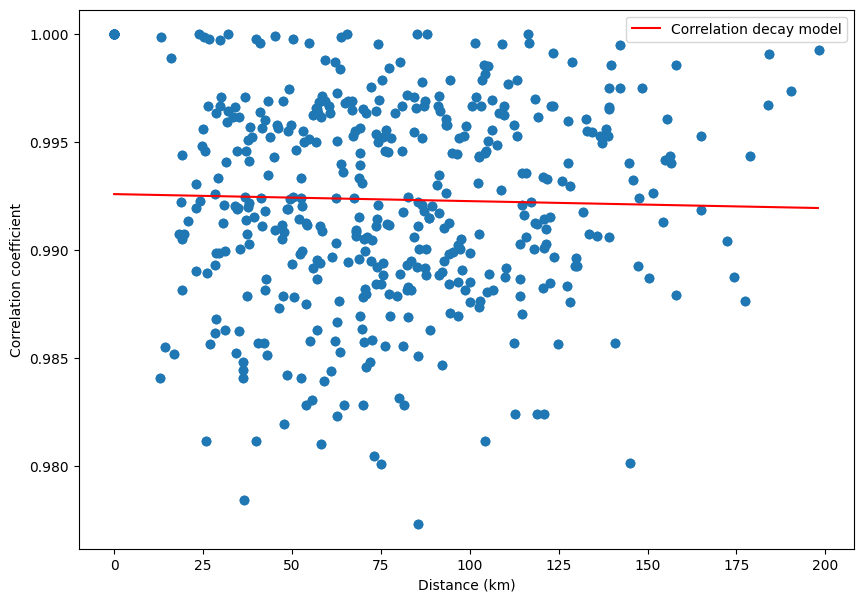

C0 estimated number: 0.9925927911818904
Decay constant a estimated coeffiecint: 3.28288420353901e-06


In [24]:
# Fit the correlation decay model to the data and plot it
popt, pcov = curve_fit(correlation_decay_model, distances_flattened, corr_flattened)
c0 = popt[0]
a = popt[1]
minimum=min(distances_flattened)
maximum=max(distances_flattened)
step=(maximum - minimum)/len(distances_flattened)
d_fit = np.arange(minimum, maximum, step)
corr_fit = correlation_decay_model(d_fit, c0, a)
plt.figure(figsize=(10,7))
plt.scatter(all_distances, corr_m)
plt.xlabel("Distance (km)")
plt.ylabel("Correlation coefficient")
plt.plot(d_fit, corr_fit, label="Correlation decay model", color='r')

# Display the plot and print the estimated parameters
plt.legend()
plt.show()
print("C0 estimated number:", c0)
print("Decay constant a estimated coeffiecint:", a)

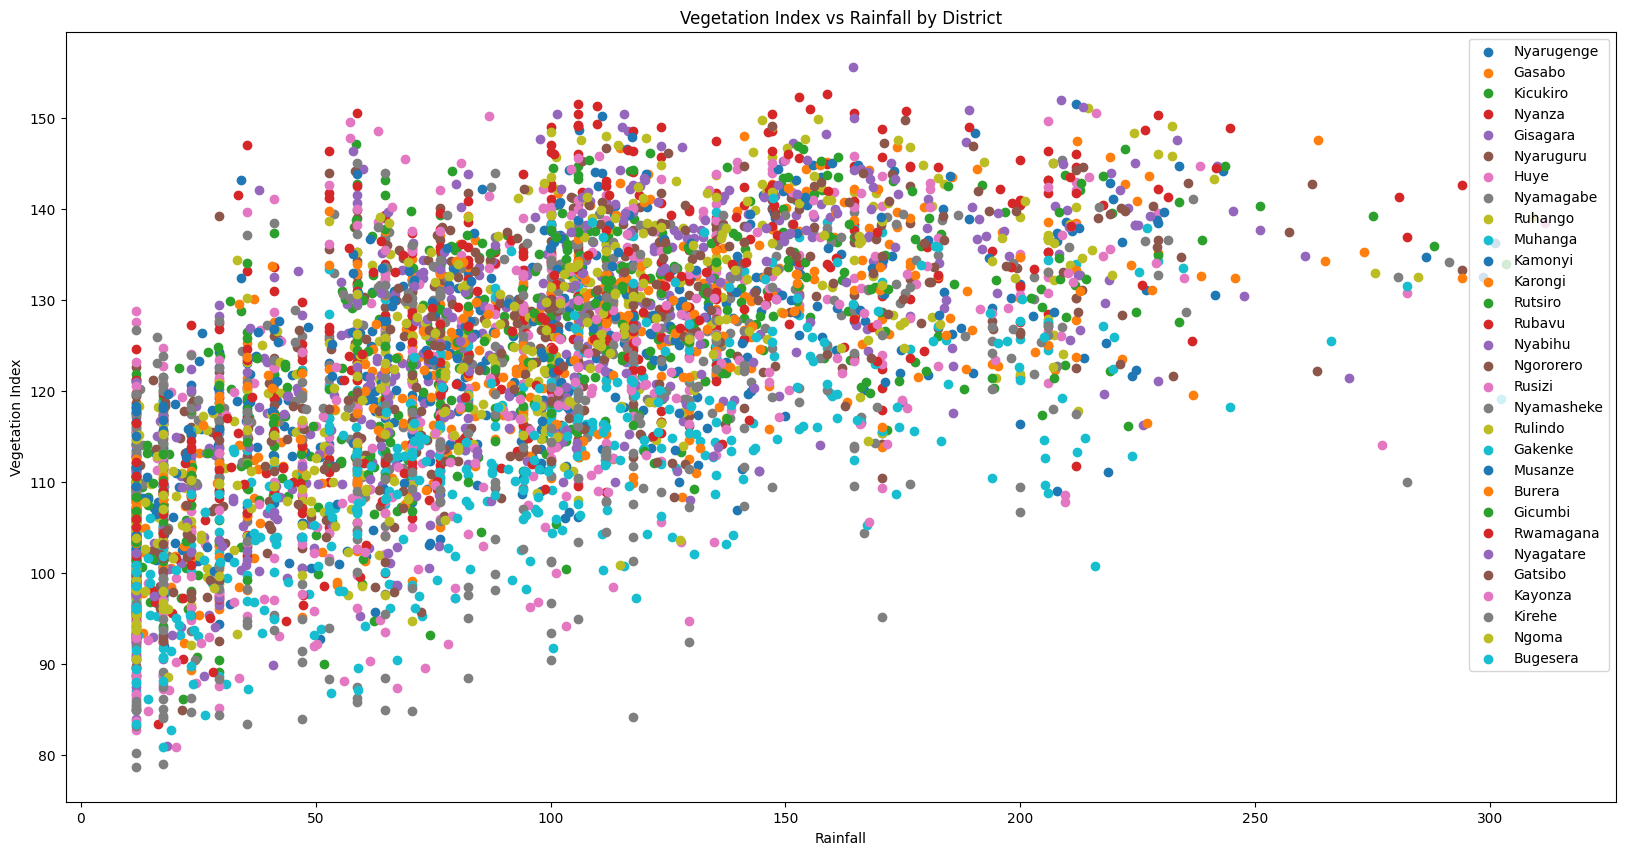

In [25]:
# Create a list of all the districts
districts = vegetation_df_rwanda['District'].unique()
# Loop over each district and plot the vegetation index against rainfall
plt.figure(figsize=(20,10))
for district in districts:
    # Get the name of the district in the vegetation index dataset
    veg_district = vegetation_df_rwanda.loc[vegetation_df_rwanda["District"] == district]["District"].values[0]
    # Check if the district names match
    if district == veg_district:
        # Get the rainfall and vegetation index data for the current district
        rainfall = rainfall_df_rwanda.loc[rainfall_df_rwanda["Month"] == district].iloc[:, 1:]
        vegetation = vegetation_df_rwanda.loc[vegetation_df_rwanda["District"] == district].iloc[:, 2:]
        # Synchronize the dates by removing any extra columns in the dataframes
        rainfall = rainfall.iloc[:, :vegetation.shape[1]]
        vegetation = vegetation.iloc[:, :rainfall.shape[1]]
        # Create a scatter plot of vegetation index against rainfall for the current district
        
        plt.scatter(rainfall.values.flatten(), vegetation.values.flatten(), label=district)
# Add a legend to the plot
plt.legend()
# Set the axis labels and title for the plot
plt.xlabel("Rainfall")
plt.ylabel("Vegetation Index")
plt.title("Vegetation Index vs Rainfall by District")
# Display the plot
plt.show()
